# Numerical solution for sistems of nonlinear equations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Initial system of equations:
\begin{equation*}
 \begin{cases}
   x_1 + 3lnx_1 - x_2^2 = 0
   \\
   2x_1^2 - x_1x_2 - 5x_1 + 1 = 0
   \\
   x_1 > 0, x_2 > 0.
 \end{cases}
\end{equation*}

In [2]:
epsilon = 10 ** -6

In [3]:
def f(x):
    return np.array(([x[0] + 3 * np.log(x[0]) - x[1] ** 2, 2 * (x[0] ** 2) - x[0] * x[1] - 5 * x[0] + 1]))

def df(x):
    return np.array([[1 + 3 / x[0], -2 * x[1]], [4 * x[0] - x[1] - 5, -x[0]]])

In [4]:
x = np.arange(0.1, 5, 0.1)

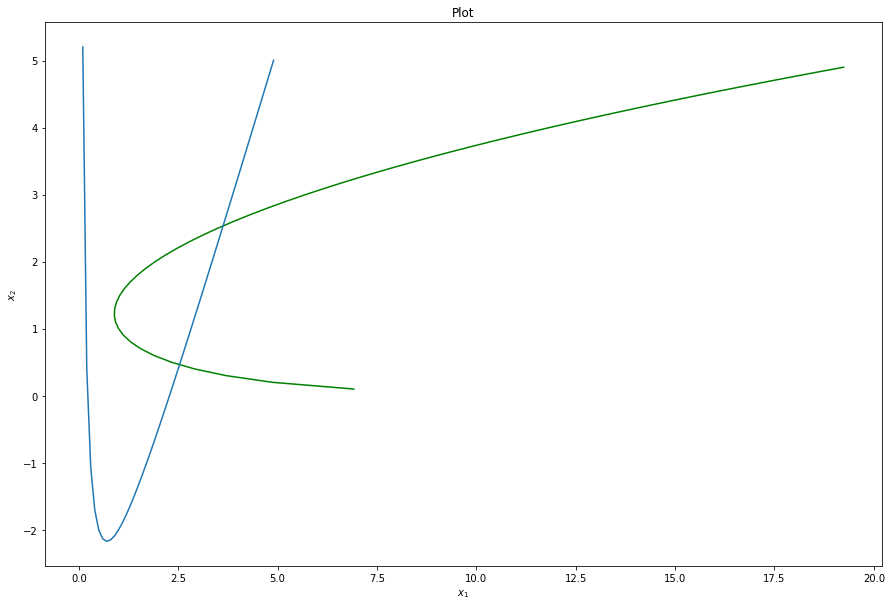

In [5]:
plt.figure(figsize=(15, 10))
plt.plot(x ** 2 - 3 * np.log(x), x, color='green')
plt.plot(x, (2 * (x ** 2) - 5 * x + 1) / x)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Plot')
plt.show()

* Taking plot into account I'll take $x^{(0)}$ = (4.0, 2.5) as initial approximation.

### Newton method:

In [25]:
data = {'x_1(k)': [4.0],
        'x_2(k)': [2.5],
        '||x(k) - x(k - 1)||': ['-']}

report_data_nt = pd.DataFrame(data)
report_data_nt.columns = pd.MultiIndex.from_tuples([('', 'x_1(k)'), ('Newton method', 'x_2(k)'), ('', '||x(k) - x(k - 1)||')])
report_data_nt

,,Newton method,
,x_1(k),x_2(k),||x(k) - x(k - 1)||
0,4.0,2.5,-


In [26]:
x = np.array([4.0, 3.0])
delta = x
k = 0
norm = np.linalg.norm(delta, ord=np.inf)
while (norm >= epsilon) & (k < 1000):
    delta = np.linalg.solve(df(x), -f(x))
    norm = np.linalg.norm(delta, ord=np.inf)
    x += delta
    k += 1
    report_data_nt.loc[len(report_data_nt)] = [x[0], x[1], format(norm, '.15f')]

In [27]:
np.linalg.norm(f(x), ord=np.inf)

3.552713678800501e-15

In [28]:
report_data_nt

,,Newton method,
,x_1(k),x_2(k),||x(k) - x(k - 1)||
0,4.000000,2.500000,-
1,3.771598,2.793197,0.228401650403934
2,3.756896,2.779905,0.014702716752026
3,3.756834,2.779850,0.000061623748191
4,3.756834,2.779850,0.000000001083080


### Curves method:

In [29]:
x_1 = np.array([4.0, 3.0])
x_2 = x_1 + np.linalg.solve(df(x_1), -f(x_1))
#x_2 = np.array([2.6, 1.2])
norm = np.linalg.norm(x_1 - x_2, ord=np.inf)
print(x_1, x_2)

[4. 3.] [3.77159835 2.7931967 ]


In [30]:
data = {'x_1(k)': [x_1[0], x_2[0]],
        'x_2(k)': [x_1[1], x_2[1]],
        '||x(k) - x(k - 1)||': ['-', format(norm, '.15f')]}

report_data_cur = pd.DataFrame(data)
report_data_cur.columns = pd.MultiIndex.from_tuples([('', 'x_1(k)'), ('Curves method', 'x_2(k)'), ('', '||x(k) - x(k - 1)||')])
report_data_cur

,,Curves method,
,x_1(k),x_2(k),||x(k) - x(k - 1)||
0,4.000000,3.000000,-
1,3.771598,2.793197,0.228401650403935


In [31]:
"""def f1(x1, x2):
    return x1 + 3 * np.log(x1) - x2 ** 2

def f2(x1, x2):
    return 2 * (x1 ** 2) - x1 * x2 - 5 * x1 + 1"""

'def f1(x1, x2):\n    return x1 + 3 * np.log(x1) - x2 ** 2\n\ndef f2(x1, x2):\n    return 2 * (x1 ** 2) - x1 * x2 - 5 * x1 + 1'

In [32]:
"""def I(x1, x2):
    return np.array([[(f1(x2[0], x2[1]) - f1(x1[0], x2[1])) / (x2[0] - x1[0]),
                      (f1(x2[0], x2[1]) - f1(x2[0], x1[1])) / (x2[1] - x1[1])],
                     [(f2(x2[0], x2[1]) - f2(x1[0], x2[1])) / (x2[0] - x1[0]),
                      (f2(x2[0], x2[1]) - f2(x2[0], x1[1])) / (x2[1] - x1[1])]])"""

def I(x1, x2):
    return np.array([(f(x2) - f([x1[0], x2[1]])) / (x2[0] - x1[0]), (f(x2) - f([x2[0], x1[1]])) / (x2[1] - x1[1])]).T

In [33]:
k = 0
while (norm >= epsilon) & (k < 1000):
    matrixI = I(x_1, x_2)
    delta = np.linalg.solve(matrixI, -f(x_2))
    norm = np.linalg.norm(delta, ord=np.inf)
    k += 1
    x_1 = x_2.copy()
    x_2 += delta
    report_data_cur.loc[len(report_data_cur)] = [x_2[0], x_2[1], format(norm, '.15f')]

In [34]:
np.linalg.norm(f(x_2), ord=np.inf)

7.815970093361102e-14

In [35]:
report_data_cur

,,Curves method,
,x_1(k),x_2(k),||x(k) - x(k - 1)||
0,4.000000,3.000000,-
1,3.771598,2.793197,0.228401650403935
2,3.758219,2.780843,0.013379621311866
3,3.756842,2.779855,0.001376493045292
4,3.756834,2.779850,0.000008222719704
5,3.756834,2.779850,0.000000004506420


### Gauss-Zeidel method:

In [56]:
def df1(x):
    return 4 * x[0] - x[1] - 5

def df2(x):
    return -2 * x[1]

In [73]:
data = {'x_1(k)': [4.0],
        'x_2(k)': [2.5],
        '||x(k) - x(k - 1)||': ['-']}

report_data_gz = pd.DataFrame(data)
report_data_gz.columns = pd.MultiIndex.from_tuples([('', 'x_1(k)'), ('Gauss-Zeidel method', 'x_2(k)'), ('', '||x(k) - x(k - 1)||')])
report_data_gz

,,Gauss-Zeidel method,
,x_1(k),x_2(k),||x(k) - x(k - 1)||
0,4.0,2.5,-


In [74]:
x = np.array([4.0, 3.5])
k = 0
norm = np.linalg.norm(f(x), ord=np.inf)
while (norm >= 2 * epsilon) & (k < 1000):
    delta = f(x)[1] / df1(x)
    while abs(delta) >= epsilon:
        delta = f(x)[1] / df1(x)
        x[0] -= delta
    delta = f(x)[0] / df2(x)
    while abs(delta) >= epsilon:
        delta = f(x)[0] / df2(x)
        x[1] -= delta
    norm = np.linalg.norm(f(x), ord=np.inf)
    k += 1
    report_data_gz.loc[len(report_data_gz)] = [x[0], x[1], format(norm, '.15f')]

In [75]:
np.linalg.norm(f(x), ord=np.inf)

1.9744588142245334e-06

In [76]:
report_data_gz

,,Gauss-Zeidel method,
,x_1(k),x_2(k),||x(k) - x(k - 1)||
0,4.000000,2.500000,-
1,4.128902,2.895330,2.496622376420902
2,3.816661,2.799069,0.367395997037139
3,3.766796,2.783068,0.060271421185238
4,3.758503,2.780389,0.010069733565992
5,3.757114,2.779940,0.001687541838347
6,3.756881,2.779865,0.000282952904598
7,3.756842,2.779852,0.000047447263022
8,3.756835,2.779850,0.000007956360381


In [77]:
report = pd.concat([report_data_nt, report_data_cur, report_data_gz], axis=1).fillna('-')
report

Newton method                               Curves method  \
     x_1(k)        x_2(k) ||x(k) - x(k - 1)||    x_1(k)        x_2(k)   
0       4.0           2.5                   -       4.0           3.0   
1  3.771598      2.793197   0.228401650403934  3.771598      2.793197   
2  3.756896      2.779905   0.014702716752026  3.758219      2.780843   
3  3.756834       2.77985   0.000061623748191  3.756842      2.779855   
4  3.756834       2.77985   0.000000001083080  3.756834       2.77985   
5         -             -                   -  3.756834       2.77985   
6         -             -                   -         -             -   
7         -             -                   -         -             -   
8         -             -                   -         -             -   
9         -             -                   -         -             -   

                                Gauss-Zeidel method                      
  ||x(k) - x(k - 1)||    x_1(k)              x_2(k) ||x(k) - x(k - 1)||  
0                   -  4.000000            2.500000                   -  
1   0.228401650403935  4.128902            2.895330   2.496622376420902  
2   0.013379621311866  3.816661            2.799069   0.367395997037139  
3   0.001376493045292  3.766796            2.783068   0.060271421185238  
4   0.000008222719704  3.758503            2.780389   0.010069733565992  
5   0.000000004506420  3.757114            2.779940   0.001687541838347  
6                   -  3.756881            2.779865   0.000282952904598  
7                   -  3.756842            2.779852   0.000047447263022  
8                   -  3.756835            2.779850   0.000007956360381  
9                   -  3.756834            2.779850   0.000001974458814